In [237]:
import pandas as pd
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv('weight-height.csv')

## Label Encoder

In [239]:
from sklearn.preprocessing import LabelEncoder

In [240]:
le = LabelEncoder()

In [241]:
df['Gender'] = le.fit_transform(df['Gender'])

In [242]:
df['Gender'].value_counts()

1    5000
0    3555
Name: Gender, dtype: int64

In [243]:
df.tail(3)

,Gender,Height,Weight
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


In [244]:
X = df.drop(['Weight'], 1)
y = df[['Weight']]

In [245]:
print(X.head())
print(y.head())

   Gender     Height
0       1  73.847017
1       1  68.781904
2       1  74.110105
3       1  71.730978
4       1  69.881796
       Weight
0  241.893563
1  162.310473
2  212.740856
3  220.042470
4  206.349801


## Test & Train DataSet

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [248]:
from sklearn.linear_model import LinearRegression

## Linear Regression

In [249]:
lr = LinearRegression()

In [250]:
lr.fit(X_train, y_train)

LinearRegression()

In [251]:
y_prediction = lr.predict(X_test)
y_prediction

array([[142.44868114],
       [186.0517281 ],
       [198.42283706],
       ...,
       [102.94080643],
       [190.83713617],
       [143.34786753]])

In [252]:
lr.predict(X)

array([[215.59851843],
       [185.42952389],
       [217.16553414],
       ...,
       [146.84088244],
       [157.83558057],
       [119.07133909]])

In [253]:
df['Predicted Rent'] = lr.predict(X)
df.head()

,Gender,Height,Weight,Predicted Rent
0,1,73.847017,241.893563,215.598518
1,1,68.781904,162.310473,185.429524
2,1,74.110105,212.740856,217.165534
3,1,71.730978,220.042470,202.994899
4,1,69.881796,206.349801,191.980736


In [254]:
pred_y = lr.predict(X_test)
pred_y

array([[142.44868114],
       [186.0517281 ],
       [198.42283706],
       ...,
       [102.94080643],
       [190.83713617],
       [143.34786753]])

In [255]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_y)
mse

96.83734437830611

In [256]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred_y)
mae

7.870097130738319

In [257]:
r2_score = lr.score(X_test,y_test)
print(r2_score*100,'%')

90.59112424422659 %


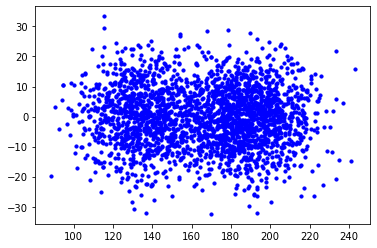

In [258]:
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

## KNN Regressor

In [259]:
from sklearn.neighbors import KNeighborsRegressor

In [260]:
knnr = KNeighborsRegressor(n_neighbors=5)

In [261]:
knnr.fit(X_train, y_train)

KNeighborsRegressor()

In [262]:
y_prediction = knnr.predict(X_test)
y_prediction

array([[142.1445657 ],
       [181.38276924],
       [187.07075266],
       ...,
       [101.79654426],
       [192.43702356],
       [145.3632227 ]])

In [263]:
df['Predicted Rent'] = knnr.predict(X)
df.head()

,Gender,Height,Weight,Predicted Rent
0,1,73.847017,241.893563,226.436919
1,1,68.781904,162.310473,177.812864
2,1,74.110105,212.740856,209.339650
3,1,71.730978,220.042470,202.632591
4,1,69.881796,206.349801,195.733860


In [264]:
knnr.score(X_test, y_test) #testing accuracy

0.8821086423439015

In [265]:
mse = mean_squared_error(y_test, pred_y)
mse

96.83734437830611

In [266]:
mae = mean_absolute_error(y_test, pred_y)
mae

7.870097130738319

In [267]:
r2_score = knnr.score(X_test,y_test)
print(r2_score*100,'%')

88.21086423439016 %


## KNN Classifier

In [268]:
df.head(2)

,Gender,Height,Weight,Predicted Rent
0,1,73.847017,241.893563,226.436919
1,1,68.781904,162.310473,177.812864


In [269]:
X = df.drop(['Gender'], 1)
y = df[['Gender']]

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [271]:
from sklearn.neighbors import KNeighborsClassifier

In [272]:
knnc = KNeighborsClassifier(n_neighbors=5)

In [273]:
knnc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [274]:
y_prediction = knnc.predict(X_test)
y_prediction

array([0, 1, 1, ..., 0, 1, 0])

In [275]:
r2_score = knnc.score(X_test,y_test)
print(r2_score*100,'%')

98.09115699259836 %


In [276]:
from sklearn.metrics import confusion_matrix

In [277]:
cm = confusion_matrix(y_test, y_prediction)
cm

array([[1048,   18],
       [  31, 1470]], dtype=int64)

In [278]:
from sklearn.metrics import roc_auc_score

In [279]:
y_prediction[:]

array([0, 1, 1, ..., 0, 1, 0])

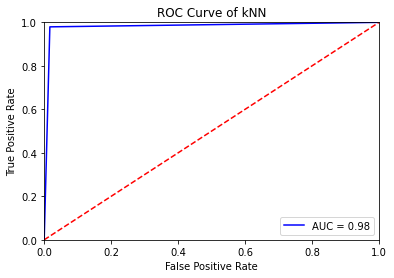

In [280]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt


fpr,tpr, threshold = roc_curve(y_test, y_prediction)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [281]:
from sklearn.metrics import classification_report

In [282]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1066
           1       0.99      0.98      0.98      1501

    accuracy                           0.98      2567
   macro avg       0.98      0.98      0.98      2567
weighted avg       0.98      0.98      0.98      2567

